# Business Understanding

## Project Domain

Retail & E-Commerce / Consumer Electronics

Proyek ini berada dalam domain penjualan elektronik konsumen, khususnya laptop. Prediksi harga laptop berdasarkan spesifikasi teknis sangat relevan untuk platform e-commerce, toko ritel elektronik, maupun produsen yang ingin menetapkan harga kompetitif berdasarkan fitur-fitur tertentu.

## Problem Statements

Harga laptop sangat bervariasi tergantung pada spesifikasi seperti RAM, penyimpanan, prosesor, tipe layar, dan lainnya. Banyak pelanggan kesulitan menilai apakah harga laptop yang ditawarkan sesuai dengan nilai sebenarnya. Di sisi lain, penjual juga memerlukan cara sistematis untuk menetapkan harga produk mereka agar bersaing di pasar.

## Goals

Melakukan eksplorasi dan analisis fitur-fitur dalam dataset laptop.

Membersihkan dan menyiapkan data untuk modeling machine learning.

Membangun model Artificial Neural Network (ANN) untuk memprediksi harga laptop.

Mengevaluasi performa model berdasarkan metrik regresi seperti MSE dan R².

Menyediakan simulasi prediksi untuk user akhir (misalnya toko atau pelanggan).

Menyimpan model agar bisa digunakan dalam aplikasi produksi di masa depan.

## Solution Statements

Solusi yang diusulkan adalah membangun model prediksi harga laptop menggunakan Artificial Neural Network (ANN). Model ini akan:

Menggunakan fitur numerik dan kategorikal dari dataset laptop.

Dilatih menggunakan TensorFlow/Keras untuk memprediksi harga berdasarkan fitur input.

Dievaluasi dengan metrik regresi (MSE, R²).

Disimpan dan digunakan kembali untuk kebutuhan deployment atau simulasi.

Dengan solusi ini, pengguna (baik penjual maupun pembeli) dapat:

Memvalidasi harga laptop berdasarkan spesifikasinya.

Menentukan harga pasar wajar sebelum membeli atau menjual produk.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"helmiilmawan","key":"cb12fdb5930026b01095ea779cbf8d78"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d mrsimple07/laptoppriceprediction

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction
License(s): apache-2.0
  0% 0.00/39.1k [00:00<?, ?B/s]
100% 39.1k/39.1k [00:00<00:00, 135MB/s]


In [ ]:
!mkdir laptoppriceprediction
!unzip laptoppriceprediction.zip -d laptoppriceprediction
!ls laptoppriceprediction

Archive:  laptoppriceprediction.zip
  inflating: laptoppriceprediction/Laptop_price.csv  
Laptop_price.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/laptoppriceprediction.zip')

In [ ]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


## Exploratory Data Analysis

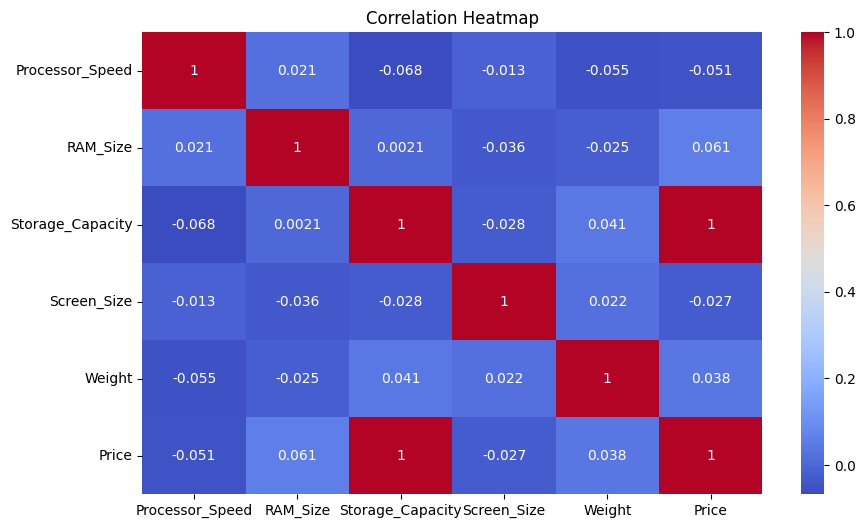

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

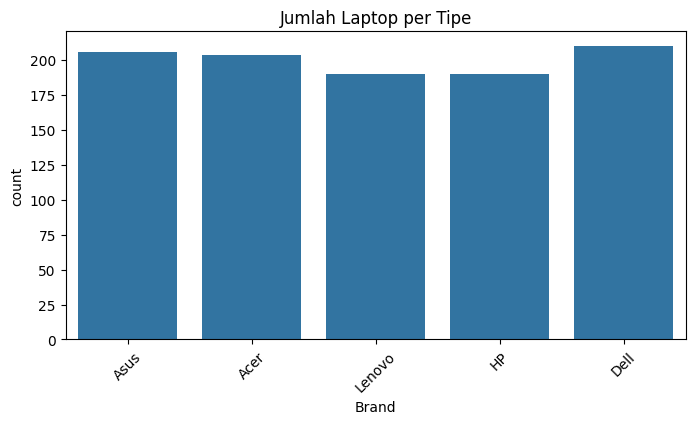

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Brand')
plt.title("Jumlah Laptop per Tipe")
plt.xticks(rotation=45)
plt.show()

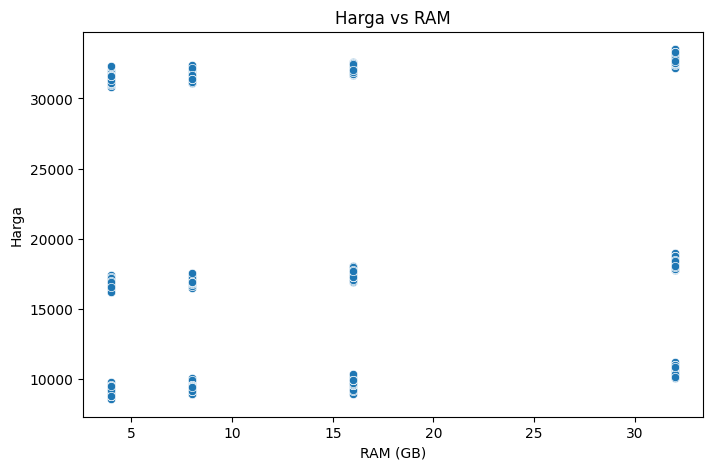

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='RAM_Size', y='Price', data=df) # Assuming 'Ram' and 'Price' are the correct column names
plt.title("Harga vs RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Harga")
plt.show()

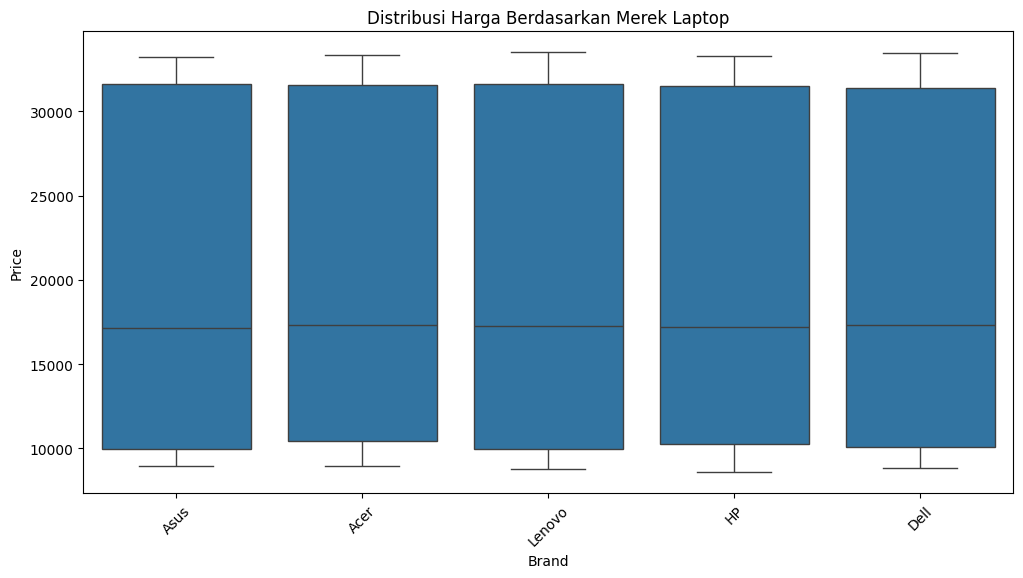

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title("Distribusi Harga Berdasarkan Merek Laptop")
plt.xticks(rotation=45)
plt.show()

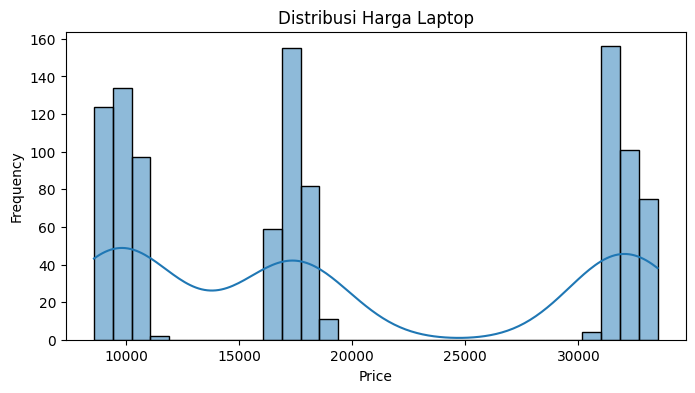

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribusi Harga Laptop")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X_train = df[["Brand", "Processor_Speed", "RAM_Size", "Storage_Capacity", "Screen_Size", "Weight"]]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train = X_train.drop(columns=[col for col in X_train.columns if X_train[col].dtype == 'object'])
X_test = X_test.drop(columns=[col for col in X_test.columns if X_test[col].dtype == 'object'])

In [ ]:
for column in X.columns:
  if X[column].dtype == 'object':
    X_train[column + '_encoded'] = le.fit_transform(X_train[column])
    X_test[column + '_encoded'] = le.transform(X_test[column])


In [ ]:
le = LabelEncoder()

# Modeling

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # regresi output
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 465533824.0000 - mae: 19484.8535 - val_loss: 570148864.0000 - val_mae: 21690.1602
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 482186304.0000 - mae: 19909.9238 - val_loss: 569896064.0000 - val_mae: 21684.6172
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 472410976.0000 - mae: 19671.9258 - val_loss: 569409600.0000 - val_mae: 21674.1973
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 478988064.0000 - mae: 19806.4648 - val_loss: 568536192.0000 - val_mae: 21655.8203
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 452570944.0000 - mae: 19223.1055 - val_loss: 567109504.0000 - val_mae: 21626.1328
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 466653824.0000 - mae: 19486.3906 - val_loss: 564908032.0000 - val_mae: 21580.9062
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 451838752.0000 - mae: 19187.1641 - val_loss: 561760192.0000 - val_mae: 21516.4609
Epoch 8/50
23/23 ━━

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# Evaluation

In [ ]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error on Test Data: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1749972.7500 - mae: 1115.3727
Mean Absolute Error on Test Data: 1117.0220


# Deployment

## Model Simulation

In [ ]:
 def simulate_prediction(model, scaler, brand, processor_speed, ram_size, storage_capacity, screen_size, weight):

  # Create a dataframe with the input data
  input_data = pd.DataFrame([[brand, processor_speed, ram_size, storage_capacity, screen_size, weight]],
                            columns=["Brand", "Processor_Speed", "RAM_Size", "Storage_Capacity", "Screen_Size", "Weight"])


  # Get the columns from the training data after one-hot encoding
  train_cols = X_train.columns.tolist()

  # One-hot encode the input data
  input_data_encoded = pd.get_dummies(input_data)

  # Reindex the input data to match the training columns, filling missing columns with 0
  input_data_encoded = input_data_encoded.reindex(columns=train_cols, fill_value=0)

  # Scale the input data
  input_data_scaled = scaler.transform(input_data_encoded)

  # Make the prediction
  predicted_price = model.predict(input_data_scaled)

  return predicted_price[0][0]


input_brand = "Dell"
input_processor_speed = 2.5
input_ram_size = 16
input_storage_capacity = 512
input_screen_size = 15.6
input_weight = 2.0

# prediksi harga laptop
predicted_price = simulate_prediction(model, scaler, input_brand, input_processor_speed, input_ram_size, input_storage_capacity, input_screen_size, input_weight)

print(f"Prediksi Harga laptop: ${predicted_price:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediksi Harga laptop: $16592.16


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('laptoppriceprediction.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp2tkcigda'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139239987573584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239987575696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139238185469520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139238185469904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239987576656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239987573200: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']